In [1]:
from ipynb.fs.full.tokyo_NLP import *

/Users/karthikmahendra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


station is repeated 3596 times.
tokyo is repeated 2405 times.
room is repeated 2284 times.
shinjuku is repeated 1665 times.
line is repeated 1322 times.
minutes is repeated 1235 times.
house is repeated 1126 times.
min is repeated 1057 times.
walk is repeated 980 times.
asakusa is repeated 837 times.
bed is repeated 823 times.
jr is repeated 789 times.
area is repeated 787 times.
airport is repeated 766 times.
apartment is repeated 724 times.
mins is repeated 723 times.
ikebukuro is repeated 720 times.
access is repeated 686 times.
shibuya is repeated 641 times.
rooms is repeated 632 times.
restaurants is repeated 586 times.
shopping is repeated 583 times.
kitchen is repeated 581 times.
stores is repeated 580 times.
hotel is repeated 575 times.
ueno is repeated 567 times.
convenience is repeated 510 times.
akihabara is repeated 497 times.
floor is repeated 483 times.
haneda is repeated 482 times.
train is repeated 476 times.
bathroom is repeated 470 times.
ginza is repeated 446 times.


<Figure size 1200x1200 with 1 Axes>

In [4]:
df = pd.get_dummies(listings_clean_model)

In [5]:
df.shape

(11995, 81)

In [6]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [7]:
to_drop 

[]

In [8]:
numerical_col = ['accommodates','bathrooms',
                 'cleaning_fee',
                'minimum_nights','price']

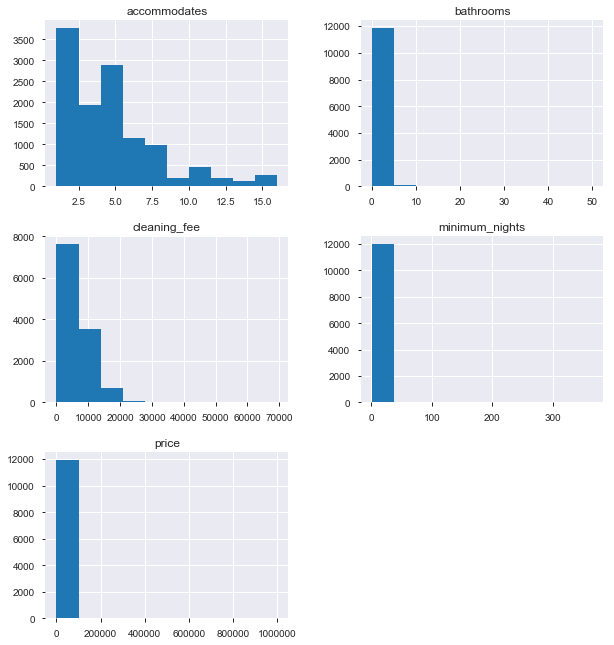

In [9]:
df[numerical_col].hist(figsize=(10,11));

In [10]:
# Log transforming columns because some features are highly skewed. 
numerical_col = [i for i in numerical_col if i not in ['accommodates']] # Removing items not to be transformed

for col in numerical_col:
        df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
        df[col] = np.log(df[col])

In [11]:
#Target
y_price = df['price']
X_price = df.drop('price', axis=1)

In [12]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_price = pd.DataFrame(scaler.fit_transform(X_price), columns=list(X_price.columns))

In [13]:
from sklearn.model_selection import train_test_split
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(
                                                           X_price, y_price, test_size=0.2, random_state=42)

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_price, y_train_price)
training_preds_xgb_reg = xgb_reg.predict(X_train_price)
val_preds_xgb_reg = xgb_reg.predict(X_test_price)

print("\nTraining MSE:", round(mean_squared_error(y_train_price, training_preds_xgb_reg),3))
print("Validation MSE:", round(mean_squared_error(y_test_price, val_preds_xgb_reg),3))

[21:48:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.36
Validation MSE: 0.321


In [15]:
print("\nTraining r2:", round(r2_score(y_train_price, training_preds_xgb_reg),3))
print("Validation r2:", round(r2_score(y_test_price, val_preds_xgb_reg),3))


Training r2: 0.55
Validation r2: 0.555


In [16]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train_price.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
#ft_weights_xgb_reg

In [17]:
# Drop feature weights of 0 
ft_weights_xgb_reg = ft_weights_xgb_reg[(ft_weights_xgb_reg != 0).all(1)]

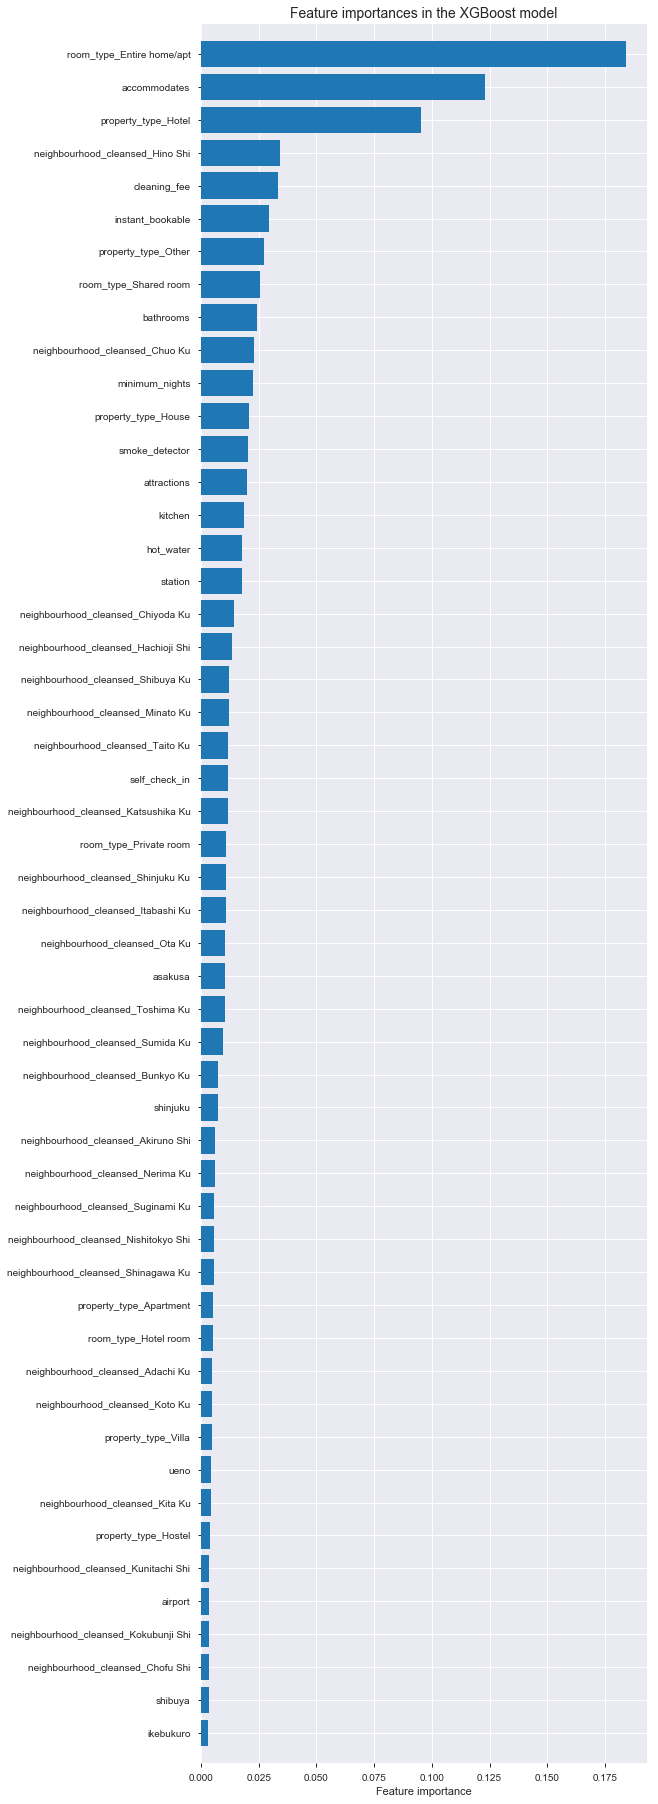

In [18]:
# Plotting feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(8,32))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

### Lets use availability_30 as Target

In [ ]:
# #Target
# y_30 = df['availability_30']
# X_30 = df.drop(['availability_30','availability_90'],axis=1)

In [ ]:
# X_30 = pd.DataFrame(scaler.fit_transform(X_30), columns=list(X_30.columns))
# X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_30, y_30, test_size=0.2, random_state=42)

In [ ]:
# xgb_reg = xgb.XGBRegressor()
# xgb_reg.fit(X_train_30, y_train_30)
# training_preds_xgb_reg = xgb_reg.predict(X_train_30)
# val_preds_xgb_reg = xgb_reg.predict(X_test_30)

# print("\nTraining MSE:", round(mean_squared_error(y_train_30, training_preds_xgb_reg),3))
# print("Validation MSE:", round(mean_squared_error(y_test_30, val_preds_xgb_reg),3))

In [ ]:
# ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train_30.columns)
# ft_weights_xgb_reg.sort_values('weight', inplace=True)

In [ ]:
# # Drop feature weights of 0 
# ft_weights_xgb_reg = ft_weights_xgb_reg[(ft_weights_xgb_reg != 0).all(1)]

In [ ]:
# # Plotting feature importances
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8,30))
# plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
# plt.title("Feature importances in the XGBoost model", fontsize=14)
# plt.xlabel("Feature importance")
# plt.margins(y=0.01)
# plt.show()

### Availability_30 has a bigger MSE. 

### Lets use availability_90 as the Target

In [ ]:
# #Target
# y_90 = df['availability_90']
# X_90 = df.drop(['availability_30','availability_90'],axis=1)

# X_90 = pd.DataFrame(scaler.fit_transform(X_90), columns=list(X_90.columns))
# X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_90, y_90, test_size=0.2, random_state=42)

# xgb_reg = xgb.XGBRegressor()
# xgb_reg.fit(X_train_90, y_train_90)
# training_preds_xgb_reg = xgb_reg.predict(X_train_90)
# val_preds_xgb_reg = xgb_reg.predict(X_test_90)

# print("\nTraining MSE:", round(mean_squared_error(y_train_90, training_preds_xgb_reg),3))
# print("Validation MSE:", round(mean_squared_error(y_test_90, val_preds_xgb_reg),3))

# ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train_90.columns)
# ft_weights_xgb_reg.sort_values('weight', inplace=True)
# # Drop feature weights of 0 
# ft_weights_xgb_reg = ft_weights_xgb_reg[(ft_weights_xgb_reg != 0).all(1)]

# # Plotting feature importances
# import matplotlib.pyplot as plt
# plt.figure(figsize=(8,30))
# plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
# plt.title("Feature importances in the XGBoost model", fontsize=14)
# plt.xlabel("Feature importance")
# plt.margins(y=0.01)
# plt.show()

### Availability_90 has a huge MSE. 

## Neural Net

In [ ]:
from keras import models, layers, optimizers, regularizers

### Build Model without regularizers

In [ ]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(
                                                           X_price, y_price, test_size=0.2, random_state=42)

In [ ]:
# Building the model
nn = models.Sequential()
nn.add(layers.Dense(128, input_shape=(X_train_price.shape[1],), activation='relu'))
nn.add(layers.Dense(256, activation='relu'))
nn.add(layers.Dense(256, activation='relu'))
nn.add(layers.Dense(512, activation='relu'))
nn.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn.summary())

In [ ]:
# Training the model
nn_history = nn.fit(X_train_price,
                  y_train_price,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

In [ ]:
def nn_model_evaluation(model,X_train, X_test, y_train, y_test, skip_epochs=0,):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = model.history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()

In [ ]:
nn_model_evaluation(nn,X_train_price,X_test_price, y_train_price, y_test_price, skip_epochs=10)

### Build Model with regularizers

In [ ]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train_price.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn2.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn2.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn2.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

In [ ]:
# Training the model
nn2_history = nn2.fit(X_train_price,
                  y_train_price,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

In [ ]:
nn_model_evaluation(nn2,X_train_price,X_test_price, y_train_price, y_test_price, skip_epochs=10)

### Neural Net with Kernal Regularizers is best performing with lowest MSE and higest R2 score. 

In [20]:
import pickle 

# Pickle the darn thing! 🥒
model_name = '/Users/karthikmahendra/Desktop/AirBnB/ABB.pkl' # path to where you want the file
pickle.dump(xgb_reg, open(model_name, 'wb')) # kitty = the name of your model 

In [23]:
X_tst = X_train_price.iloc[0]
y_tst = y_train_price.iloc[0]

In [24]:
loaded_model = pickle.load(open(model_name, 'rb'))
result = loaded_model.score(X_tst, y_tst)
print(result)

[21:57:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: feature_names mismatch: ['accommodates', 'bathrooms', 'cleaning_fee', 'minimum_nights', 'instant_bookable', 'kitchen', 'smoke_detector', 'self_check_in', 'hot_water', 'shinjuku', 'asakusa', 'ikebukuro', 'shibuya', 'ueno', 'station', 'airport', 'attractions', 'neighbourhood_cleansed_Adachi Ku', 'neighbourhood_cleansed_Akiruno Shi', 'neighbourhood_cleansed_Akishima Shi', 'neighbourhood_cleansed_Arakawa Ku', 'neighbourhood_cleansed_Bunkyo Ku', 'neighbourhood_cleansed_Chiyoda Ku', 'neighbourhood_cleansed_Chofu Shi', 'neighbourhood_cleansed_Chuo Ku', 'neighbourhood_cleansed_Edogawa Ku', 'neighbourhood_cleansed_Fuchu Shi', 'neighbourhood_cleansed_Fussa Shi', 'neighbourhood_cleansed_Hachijo Machi', 'neighbourhood_cleansed_Hachioji Shi', 'neighbourhood_cleansed_Hamura Shi', 'neighbourhood_cleansed_Higashikurume Shi', 'neighbourhood_cleansed_Higashimurayama Shi', 'neighbourhood_cleansed_Hino Shi', 'neighbourhood_cleansed_Hinohara Mura', 'neighbourhood_cleansed_Itabashi Ku', 'neighbourhood_cleansed_Katsushika Ku', 'neighbourhood_cleansed_Kita Ku', 'neighbourhood_cleansed_Kodaira Shi', 'neighbourhood_cleansed_Koganei Shi', 'neighbourhood_cleansed_Kokubunji Shi', 'neighbourhood_cleansed_Komae Shi', 'neighbourhood_cleansed_Koto Ku', 'neighbourhood_cleansed_Kunitachi Shi', 'neighbourhood_cleansed_Machida Shi', 'neighbourhood_cleansed_Meguro Ku', 'neighbourhood_cleansed_Minato Ku', 'neighbourhood_cleansed_Mitaka Shi', 'neighbourhood_cleansed_Musashimurayama Shi', 'neighbourhood_cleansed_Musashino Shi', 'neighbourhood_cleansed_Nakano Ku', 'neighbourhood_cleansed_Nerima Ku', 'neighbourhood_cleansed_Niijima Mura', 'neighbourhood_cleansed_Nishitokyo Shi', 'neighbourhood_cleansed_Ogasawara Mura', 'neighbourhood_cleansed_Okutama Machi', 'neighbourhood_cleansed_Ome Shi', 'neighbourhood_cleansed_Oshima Machi', 'neighbourhood_cleansed_Ota Ku', 'neighbourhood_cleansed_Setagaya Ku', 'neighbourhood_cleansed_Shibuya Ku', 'neighbourhood_cleansed_Shinagawa Ku', 'neighbourhood_cleansed_Shinjuku Ku', 'neighbourhood_cleansed_Suginami Ku', 'neighbourhood_cleansed_Sumida Ku', 'neighbourhood_cleansed_Tachikawa Shi', 'neighbourhood_cleansed_Taito Ku', 'neighbourhood_cleansed_Tama Shi', 'neighbourhood_cleansed_Toshima Ku', 'property_type_Apartment', 'property_type_Hostel', 'property_type_Hotel', 'property_type_House', 'property_type_Other', 'property_type_Tent', 'property_type_Villa', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79']
expected property_type_Hostel, ueno, neighbourhood_cleansed_Tachikawa Shi, neighbourhood_cleansed_Ogasawara Mura, neighbourhood_cleansed_Koto Ku, room_type_Hotel room, property_type_Villa, neighbourhood_cleansed_Suginami Ku, neighbourhood_cleansed_Meguro Ku, neighbourhood_cleansed_Akiruno Shi, bathrooms, neighbourhood_cleansed_Taito Ku, neighbourhood_cleansed_Minato Ku, asakusa, neighbourhood_cleansed_Toshima Ku, neighbourhood_cleansed_Akishima Shi, neighbourhood_cleansed_Setagaya Ku, neighbourhood_cleansed_Ota Ku, property_type_Apartment, shibuya, shinjuku, neighbourhood_cleansed_Nerima Ku, neighbourhood_cleansed_Chiyoda Ku, neighbourhood_cleansed_Sumida Ku, neighbourhood_cleansed_Komae Shi, neighbourhood_cleansed_Kodaira Shi, neighbourhood_cleansed_Nakano Ku, neighbourhood_cleansed_Fussa Shi, neighbourhood_cleansed_Oshima Machi, neighbourhood_cleansed_Tama Shi, neighbourhood_cleansed_Hinohara Mura, property_type_Hotel, attractions, neighbourhood_cleansed_Kita Ku, neighbourhood_cleansed_Hachijo Machi, room_type_Shared room, station, neighbourhood_cleansed_Itabashi Ku, neighbourhood_cleansed_Kokubunji Shi, neighbourhood_cleansed_Fuchu Shi, cleaning_fee, property_type_Other, room_type_Entire home/apt, neighbourhood_cleansed_Okutama Machi, minimum_nights, neighbourhood_cleansed_Higashikurume Shi, neighbourhood_cleansed_Chuo Ku, instant_bookable, neighbourhood_cleansed_Edogawa Ku, neighbourhood_cleansed_Mitaka Shi, neighbourhood_cleansed_Hino Shi, neighbourhood_cleansed_Shinagawa Ku, neighbourhood_cleansed_Musashino Shi, neighbourhood_cleansed_Kunitachi Shi, self_check_in, ikebukuro, neighbourhood_cleansed_Chofu Shi, neighbourhood_cleansed_Koganei Shi, airport, neighbourhood_cleansed_Niijima Mura, neighbourhood_cleansed_Hamura Shi, kitchen, neighbourhood_cleansed_Bunkyo Ku, smoke_detector, hot_water, room_type_Private room, neighbourhood_cleansed_Shibuya Ku, neighbourhood_cleansed_Shinjuku Ku, neighbourhood_cleansed_Musashimurayama Shi, neighbourhood_cleansed_Ome Shi, neighbourhood_cleansed_Higashimurayama Shi, accommodates, neighbourhood_cleansed_Machida Shi, neighbourhood_cleansed_Hachioji Shi, property_type_House, neighbourhood_cleansed_Nishitokyo Shi, neighbourhood_cleansed_Arakawa Ku, neighbourhood_cleansed_Katsushika Ku, neighbourhood_cleansed_Adachi Ku, property_type_Tent in input data
training data did not have the following fields: f58, f51, f69, f61, f74, f56, f65, f70, f50, f52, f17, f41, f19, f8, f43, f10, f75, f21, f36, f29, f54, f23, f55, f27, f60, f22, f13, f46, f5, f25, f76, f3, f1, f24, f79, f18, f14, f40, f78, f11, f7, f57, f53, f38, f2, f66, f12, f30, f67, f47, f71, f63, f77, f45, f49, f64, f62, f73, f68, f32, f26, f16, f34, f31, f15, f33, f20, f39, f6, f0, f72, f9, f44, f28, f42, f59, f4, f35, f48, f37

In [ ]:
saved_model